In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_set = pd.read_csv('../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')
data_set.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
data_set.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

#  co-relation matrix

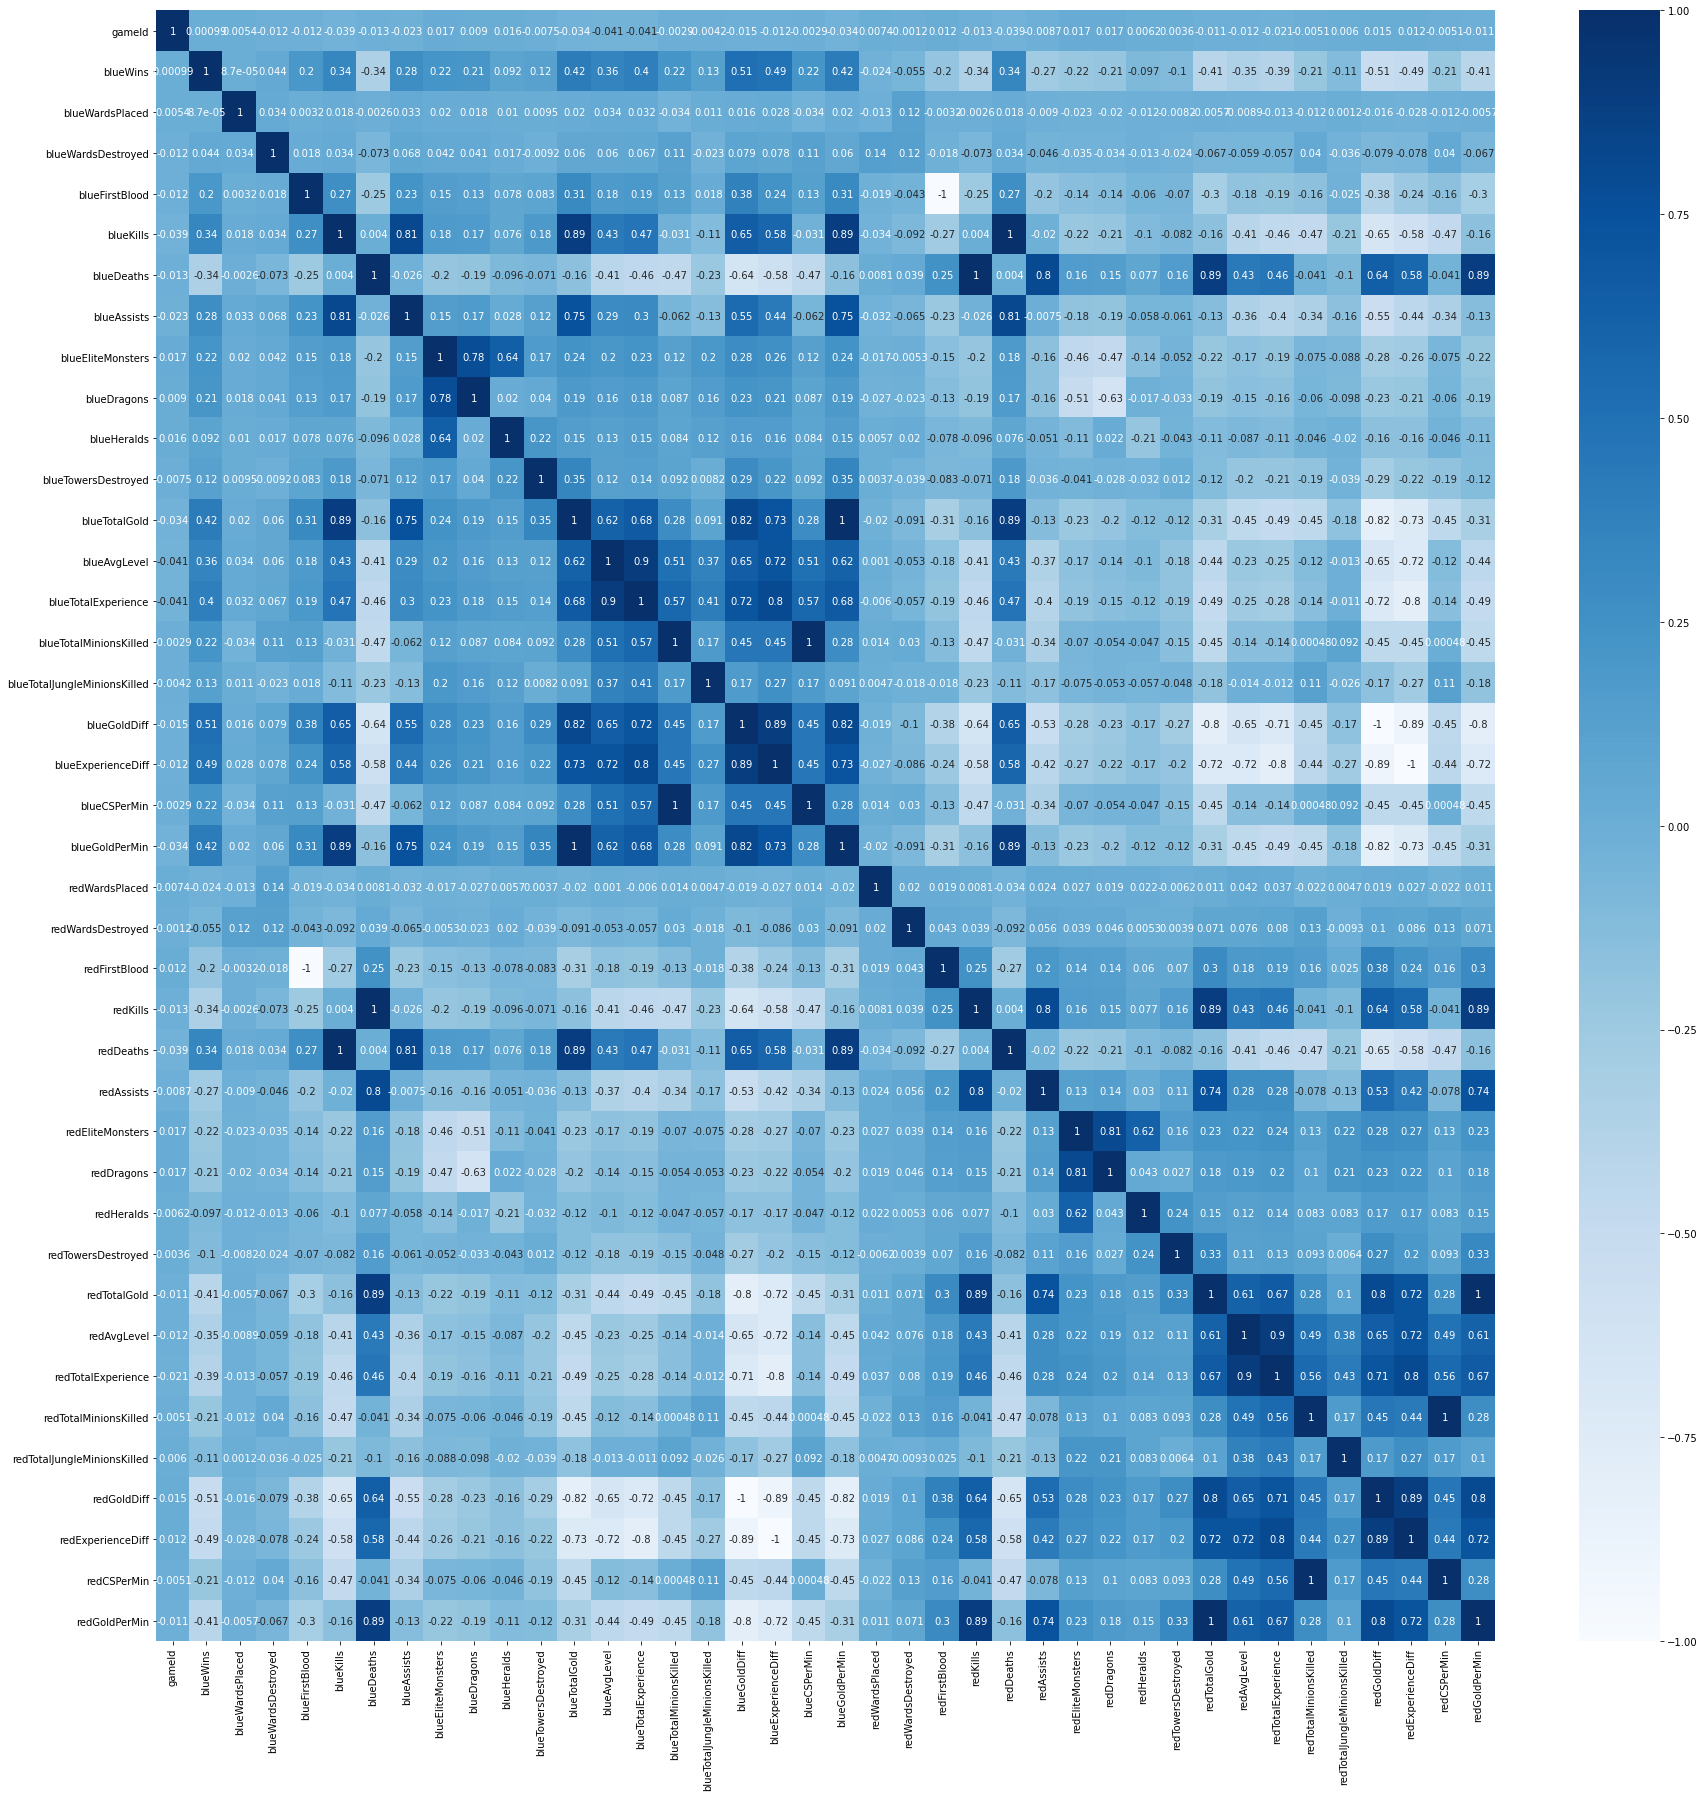

In [5]:
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Blues)
plt.show()

### dropping un-necessary variables
variables that are not related and negetively corelated

In [6]:
data_set = data_set.drop(['gameId','redKills','redDeaths','blueGoldDiff','redGoldDiff','blueExperienceDiff','redExperienceDiff','blueCSPerMin','redCSPerMin','blueAssists','redAssists','blueWardsPlaced','redWardsPlaced','blueWardsDestroyed','redWardsDestroyed','redFirstBlood','blueAvgLevel',
                          'redAvgLevel','blueHeralds','redHeralds','blueTotalJungleMinionsKilled',
                          'redTotalJungleMinionsKilled','blueTowersDestroyed','redTowersDestroyed'],axis = 1)

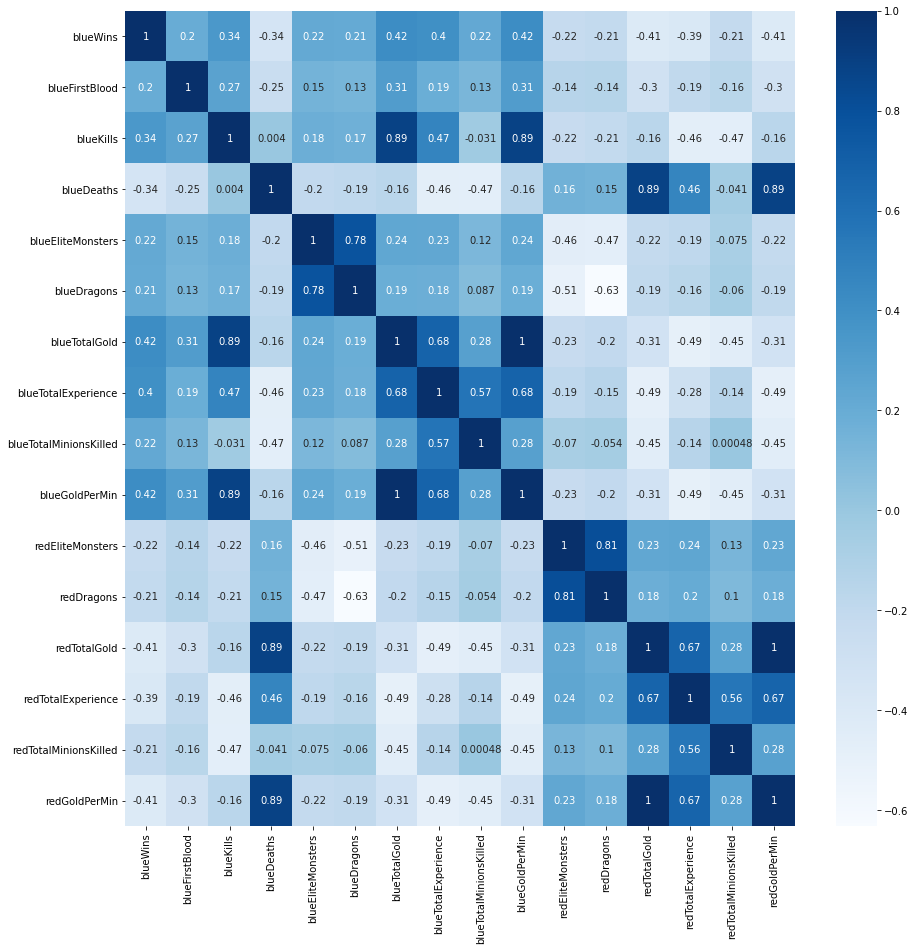

In [7]:
plt.figure(figsize = (15,15))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Blues)
plt.show()

# Exploratory_Data_analysis

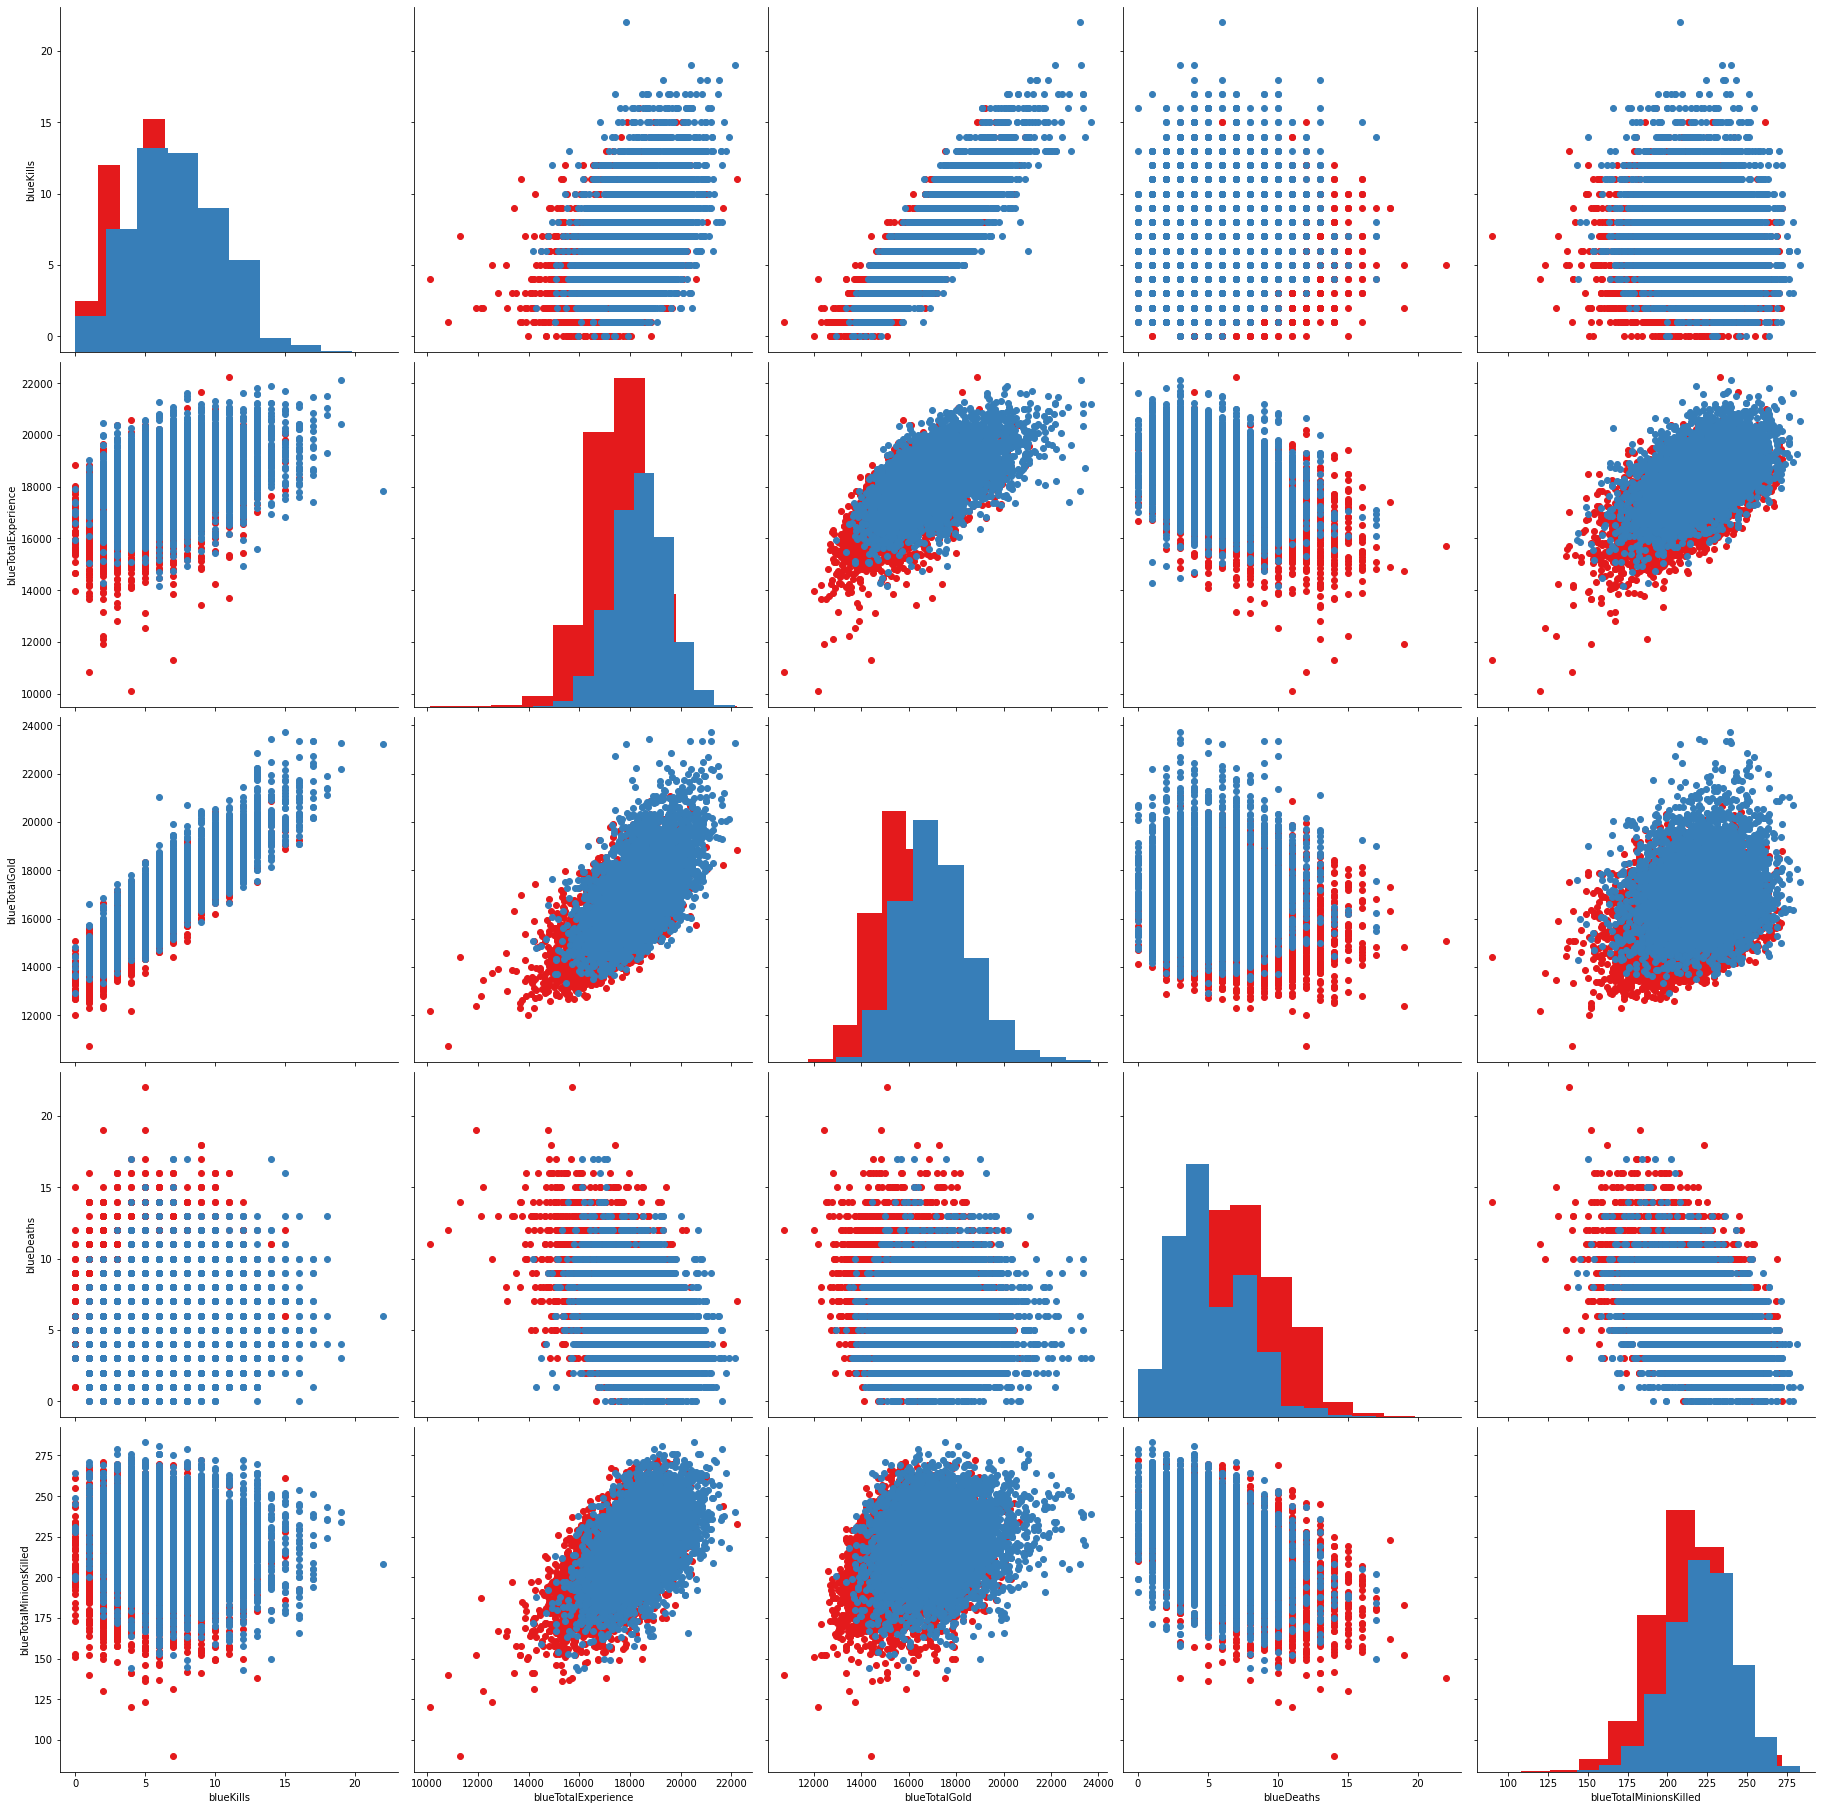

In [8]:
grid = sns.PairGrid(data=data_set, vars=['blueKills', 'blueTotalExperience', 'blueTotalGold','blueDeaths','blueTotalMinionsKilled'], hue='blueWins', height=5, palette='Set1')
grid.map_diag(plt.hist)
grid.map_offdiag(plt.scatter)

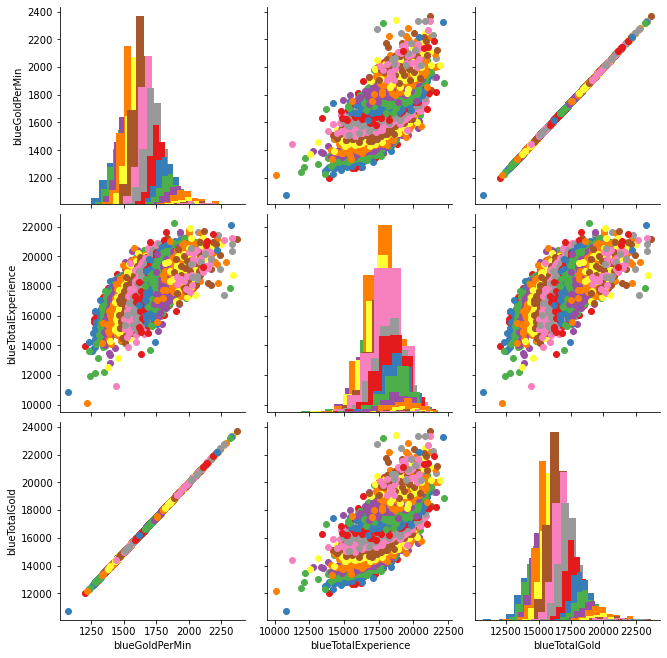

In [9]:
grid1 = sns.PairGrid(data=data_set, vars=['blueGoldPerMin', 'blueTotalExperience', 'blueTotalGold'], hue='blueKills', height=3, palette='Set1')
grid1.map_diag(plt.hist)
grid1.map_offdiag(plt.scatter)

In [10]:
data_set

,blueWins,blueFirstBlood,blueKills,blueDeaths,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,blueTotalMinionsKilled,blueGoldPerMin,redEliteMonsters,redDragons,redTotalGold,redTotalExperience,redTotalMinionsKilled,redGoldPerMin
0,0,1,9,6,0,0,17210,17039,195,1721.0,0,0,16567,17047,197,1656.7
1,0,0,5,5,0,0,14712,16265,174,1471.2,2,1,17620,17438,240,1762.0
2,0,0,7,11,1,1,16113,16221,186,1611.3,0,0,17285,17254,203,1728.5
3,0,0,4,5,1,0,15157,17954,201,1515.7,0,0,16478,17961,235,1647.8
4,0,0,6,6,0,0,16400,18543,210,1640.0,1,1,17404,18313,225,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,1,7,4,1,1,17765,18967,211,1776.5,0,0,15246,16498,229,1524.6
9875,1,0,6,4,1,1,16238,19255,233,1623.8,0,0,15456,18367,206,1545.6
9876,0,0,6,7,0,0,15903,18032,210,1590.3,1,1,18319,19909,261,1831.9
9877,0,1,2,3,1,1,14459,17229,224,1445.9,0,0,15298,18314,247,1529.8


# Data Preprocessing

In [11]:
y = data_set.iloc[:,0].values
x = data_set.iloc[:,1:].values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[-1.00367625, -0.05738756,  0.9686538 , ...,  1.10226712,
         1.54031747,  1.11045492],
       [ 0.99633722,  2.2735502 ,  0.29272153, ..., -1.42697748,
        -1.20205766, -0.41411444],
       [-1.00367625, -1.05636089, -0.72117689, ...,  0.8207759 ,
         1.54031747, -0.0094736 ],
       ...,
       [ 0.99633722,  0.94158577,  0.29272153, ..., -0.15650818,
         0.16912991,  0.40583322],
       [-1.00367625, -1.05636089, -0.72117689, ..., -0.36031785,
        -0.33363887, -0.50344208],
       [ 0.99633722, -1.05636089, -1.05914303, ..., -0.65684422,
        -0.83640764, -1.10873678]])

# Modal_Selection - XGboost

In [13]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 300,learning_rate = 0.1)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

# Metrics #1

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm,"\n accuracy:",accuracy)

[[721 293]
 [275 687]] 
 accuracy: 0.7125506072874493


# Dimensionality_Reduction

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
reduction = pca.fit_transform(x_train)
reduction_test = pca.transform(x_test)
print(pca.explained_variance_ratio_)

[0.37818716]


In [16]:
data_reduced = pd.DataFrame(data = reduction,columns = ['pc1'])

In [17]:
data_reduced

,pc1
0,-3.083063
1,-3.614319
2,0.780782
3,1.853334
4,0.547037
...,...
7898,2.340531
7899,2.687407
7900,3.483714
7901,0.948511


In [18]:
reduction_test

array([[ 3.62602809],
       [-2.94417263],
       [ 1.55344738],
       ...,
       [-1.45993797],
       [ 1.29324253],
       [-0.43070809]])

In [19]:
x_reduced = data_reduced.iloc[:,:].values

In [20]:
reduced_class = XGBClassifier(n_estimators = 300,learning_rate = 0.01)
reduced_class.fit(x_reduced,y_train)
y_reduced_pred = reduced_class.predict(reduction_test)

# metrics #2

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_reduced_pred)
accuracy = accuracy_score(y_test, y_reduced_pred)
print(cm,"\n accuracy:",accuracy)

[[744 270]
 [252 710]] 
 accuracy: 0.7358299595141701
